In [193]:
!pip install yellowbrick

                                              0.0/282.6 kB ? eta -:--:--
     -------------------------------------- 282.6/282.6 kB 8.8 MB/s eta 0:00:00


In [194]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection


from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [284]:
#Loading Dataframe

#df=pd.read_csv("vehiclesFinal2.csv")
df=pd.read_csv("../data/processed_data.csv")
#df=df.drop('Unnamed: 0',axis=1)
df=df.drop('id',axis=1)

"""df=df.drop('lat',axis=1)
df=df.drop('long',axis=1)
df=df.drop('region',axis=1)"""

df2=df.copy()
df.head()
df.drop(columns='posting_date', inplace=True)
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
0,new york city,119500,2002.0,jaguar,HUMMER H1,fair,8 cylinders,diesel,61816.0,clean,automatic,4wd,full-size,SUV,black,25.827103,-80.24152
1,new york city,2999,2007.0,nissan,quest 3.5 se,good,6 cylinders,gas,120679.0,clean,other,fwd,full-size,mini-van,silver,40.632400,-74.11710
2,new york city,11000,2010.0,infiniti,ex35 journey,excellent,6 cylinders,gas,90700.0,clean,automatic,4wd,mid-size,SUV,grey,40.917700,-73.89500
3,new york city,19995,2017.0,lexus,is,fair,5 cylinders,gas,66074.0,clean,automatic,4wd,full-size,sedan,white,40.816030,-73.46397
4,new york city,2899,2003.0,nissan,murano sl awd,good,6 cylinders,gas,189000.0,clean,automatic,4wd,mid-size,SUV,silver,40.620500,-73.92390


In [285]:
#defining numerical and categorical values

num_col=['year','odometer','long','lat']
cat_cols=['region','manufacturer','model','condition','cylinders', 'type', 'paint_color','fuel','title_status','transmission','drive','size']

In [288]:
categoria = df['manufacturer'].unique()
categoria

array(['jaguar', 'nissan', 'infiniti', 'lexus', 'dodge', 'alfa-romeo',
       'honda', 'ford', 'chevrolet', 'mercedes-benz', 'jeep', 'mercury',
       'hyundai', 'porsche', 'subaru', 'toyota', 'ferrari', 'cadillac',
       'acura', 'tesla', 'bmw', 'volkswagen', 'chrysler', 'volvo',
       'lincoln', 'mazda', 'mitsubishi', 'gmc', 'fiat', 'audi', 'buick',
       'rover', 'kia', 'mini', 'ram', 'pontiac', 'land rover', 'saturn',
       'harley-davidson', 'datsun'], dtype=object)

In [281]:
le=preprocessing.LabelEncoder()
df[cat_cols]=df[cat_cols].apply(le.fit_transform)


In [289]:
for col in cat_cols:
    # Aplica LabelEncoder a la columna categórica
    df[col] = le.fit_transform(df[col])

    # Obtiene las categorías y sus números asignados
    categories = le.classes_
    category_nums = le.transform(categories)

    # Imprime las categorías y sus números asignados
    print(f"Columna: {col}")
    for category, num in zip(categories, category_nums):
        print(f"Categoría '{category}': {num}")

Columna: region
Categoría 'chicago': 0
Categoría 'los angeles': 1
Categoría 'new york city': 2
Columna: manufacturer
Categoría 'acura': 0
Categoría 'alfa-romeo': 1
Categoría 'audi': 2
Categoría 'bmw': 3
Categoría 'buick': 4
Categoría 'cadillac': 5
Categoría 'chevrolet': 6
Categoría 'chrysler': 7
Categoría 'datsun': 8
Categoría 'dodge': 9
Categoría 'ferrari': 10
Categoría 'fiat': 11
Categoría 'ford': 12
Categoría 'gmc': 13
Categoría 'harley-davidson': 14
Categoría 'honda': 15
Categoría 'hyundai': 16
Categoría 'infiniti': 17
Categoría 'jaguar': 18
Categoría 'jeep': 19
Categoría 'kia': 20
Categoría 'land rover': 21
Categoría 'lexus': 22
Categoría 'lincoln': 23
Categoría 'mazda': 24
Categoría 'mercedes-benz': 25
Categoría 'mercury': 26
Categoría 'mini': 27
Categoría 'mitsubishi': 28
Categoría 'nissan': 29
Categoría 'pontiac': 30
Categoría 'porsche': 31
Categoría 'ram': 32
Categoría 'rover': 33
Categoría 'saturn': 34
Categoría 'subaru': 35
Categoría 'tesla': 36
Categoría 'toyota': 37
Catego

In [258]:
#scaling numerical data

norm = StandardScaler()

df['price'] = np.log(df['price'])
df['odometer'] = norm.fit_transform(np.array(df['odometer']).reshape(-1,1))
df['year'] = norm.fit_transform(np.array(df['year']).reshape(-1,1))
df['model'] = norm.fit_transform(np.array(df['model']).reshape(-1,1))

#scaling target variable
q1,q3=(df['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
df=df[(df.price>=o1) & (df.price<=o2)]

df['region'] = norm.fit_transform(np.array(df['region']).reshape(-1,1))
df['lat'] = norm.fit_transform(np.array(df['lat']).reshape(-1,1))
df['long'] = norm.fit_transform(np.array(df['long']).reshape(-1,1))

In [261]:
#function to split dataset int training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(df,list(range(len(list(df.columns))-1)))

In [262]:
X_train

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat
399,1.515962,9.305560,0.303289,20,1.239381,1,4,2,0.001184,0,0,1,1,0,0,0.358620
9760,-0.892484,9.680031,0.794842,9,0.269620,2,4,2,-0.221459,0,0,1,1,7,0,0.610118
2426,1.515962,8.411610,-0.188264,6,1.533935,1,4,2,0.060931,0,0,1,1,11,6,0.358620
7536,-0.892484,10.560748,0.893153,0,0.925568,2,4,2,-0.303747,0,2,0,1,7,1,0.554263
4507,0.311739,10.462818,0.893153,32,-1.810380,2,5,4,-0.292281,0,2,0,1,8,10,-1.726290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,0.311739,9.952230,0.696532,35,1.649490,1,4,2,-0.059533,0,0,0,1,9,10,-1.691126
3540,0.311739,10.338350,0.794842,0,0.922170,1,5,2,-0.334206,0,0,1,0,0,10,-1.709323
10556,-0.892484,10.491135,0.794842,2,0.810013,1,4,2,-0.287993,0,0,0,1,0,0,0.574856
11546,-0.892484,8.496990,0.303289,12,1.535067,1,4,2,-0.428663,0,0,0,1,7,5,0.581405


In [263]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)
#function for evaluation of model
def result(y_test,y_pred):
    y_test_shifted = y_test - y_test.min() + 1
    y_pred_shifted = y_pred - y_test.min() + 1
    
    r=[]
    r.append(mean_squared_log_error(y_test_shifted, y_pred_shifted))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test_shifted,y_pred_shifted))
    r.append(round(r2_score(y_test_shifted,y_pred_shifted)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])

In [264]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [265]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 4.52731885e-01 -1.77237151e-02 -1.67391172e-03 -5.67029378e-04
 -2.52501241e-03 -2.67901275e-03 -1.33762899e-03 -7.92694995e-03
 -1.38693339e-02  2.97832778e-02  8.35907213e-03 -1.73226237e-02
  4.06334516e-02 -3.14184293e-03 -2.07070382e-03  9.14886479e-01]
MSLE : 0.003888772425605588
Root MSLE : 0.06236002265558912
R2 Score : 0.668605848090448 or 66.8606%


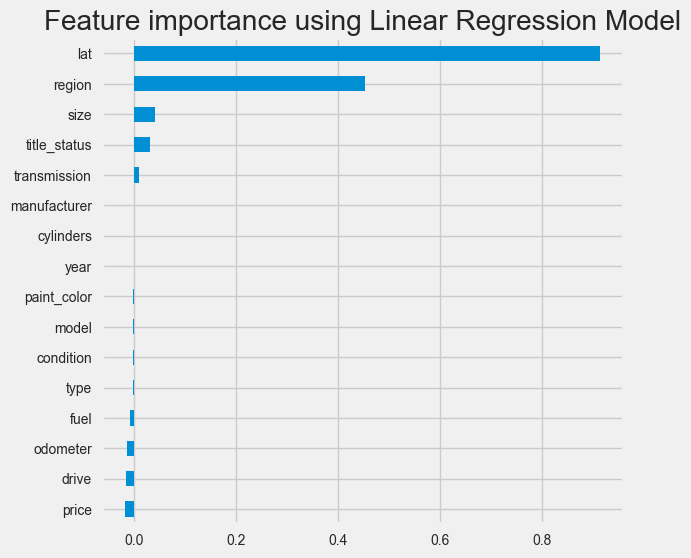

In [266]:
#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

In [267]:
y_test[y_test>0]

array([1.12366809, 0.26209641, 1.11046389, 0.26209641, 1.12191043,
       0.2464708 , 0.27225122, 0.25507402, 1.09830932, 1.14423906,
       1.14215956, 0.23581931, 0.24929057, 1.10091364, 1.09773793,
       0.26307238, 1.11111603, 0.22032332, 1.12310359, 0.26209641,
       0.2568523 , 0.25772486, 0.2506259 , 0.26620735, 0.222722  ,
       0.25373578, 0.23322573, 1.14215956, 1.12191043, 0.24908561,
       1.1015141 , 1.12402832, 0.26209641, 0.24057034, 1.13872746,
       0.23227337, 1.10287067, 0.25139604, 0.26209641, 0.26209641,
       0.26209641, 1.12111544, 1.1110415 , 0.25922788, 0.25988623,
       0.23227337, 0.2344964 , 0.2557374 , 0.24929057, 0.2618799 ,
       0.23227337, 1.10903292, 0.26209641, 1.12545059, 0.24103888,
       1.11799761, 0.26209641, 0.27216104, 0.25654797, 0.24775054,
       0.25571461, 0.25570635, 0.23227337, 0.26209641, 0.24103888,
       1.12468045, 0.21284549, 0.26060767, 0.25654797, 1.14996624,
       0.24731932, 0.24171959, 1.11111603, 1.14215956, 0.23233

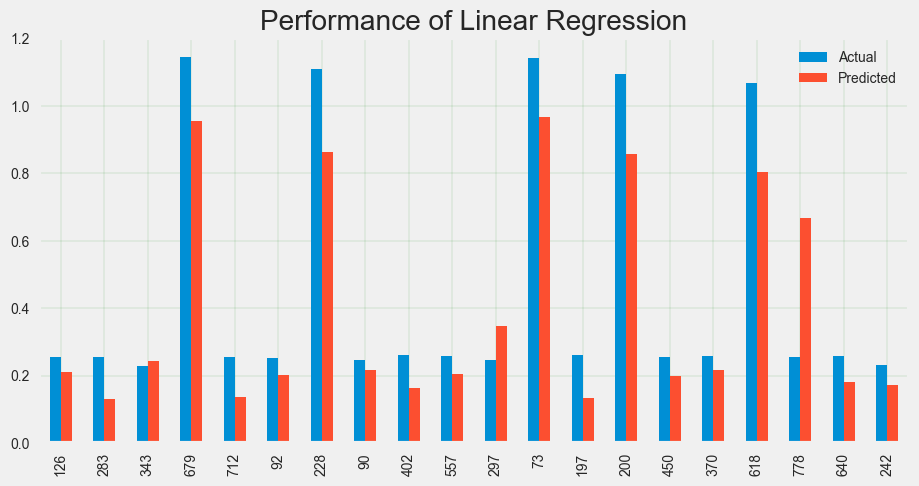

In [268]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

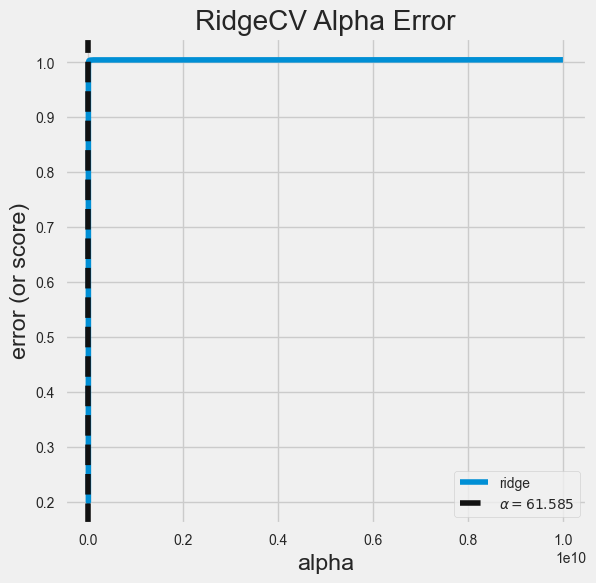

<Axes: title={'center': 'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [269]:
#predicting value of alpha

alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

In [270]:
#model object and fitting model
RR=Ridge(alpha=20.336,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)

In [271]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.0038922674326635045
Root MSLE : 0.06238803917950543
R2 Score : 0.6680566348602046 or 66.8057%


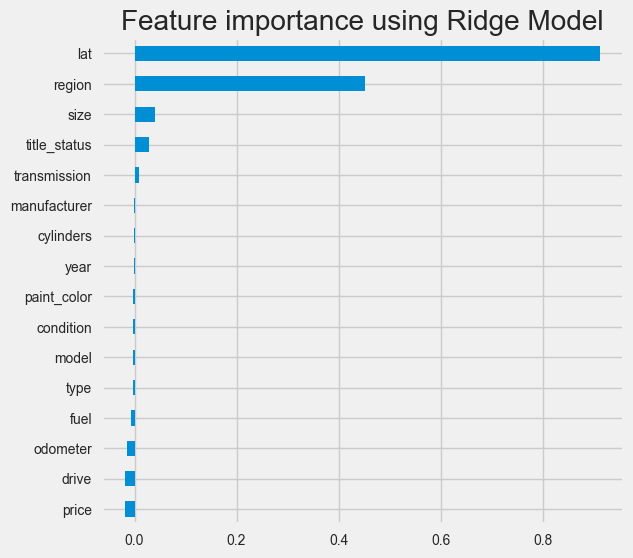

In [272]:
#Visualization of Feature Importance

coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

In [273]:
#model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [274]:
#model evaluation
y_test_3,y_pred_3=remove_neg(y_test,y_pred)
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.0038876434718510874
Root MSLE : 0.06235097009550924
R2 Score : 0.6687071946648345 or 66.8707%


In [275]:
R_MSLE=[]
R_MSE = []
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
   
    y_pred=KNN.predict(X_test)
    # Shift y Scale Transformation para MSLE
    y_test_shifted = y_test - y_test.min() + 1
    y_pred_shifted = y_pred - y_test.min() + 1

    # Calcula MSLE
    msle = mean_squared_log_error(y_test_shifted, y_pred_shifted)

    # Calcula MSE
    mse = mean_squared_error(y_test_shifted, y_pred_shifted)

    print("Mean Squared Logarithmic Error (MSLE):", msle)
    print("Mean Squared Error (MSE):", mse)
    
    R_MSLE.append(msle)
    R_MSE.append(mse)
    print("K =",i," , Root MSLE =",msle)
    print("K =",i," , Root MSE =",mse)

Mean Squared Logarithmic Error (MSLE): 0.010438921988181282
Mean Squared Error (MSE): 0.11854981607007646
K = 1  , Root MSLE = 0.010438921988181282
K = 1  , Root MSE = 0.11854981607007646
Mean Squared Logarithmic Error (MSLE): 0.010312195235159891
Mean Squared Error (MSE): 0.11315920525716973
K = 2  , Root MSLE = 0.010312195235159891
K = 2  , Root MSE = 0.11315920525716973
Mean Squared Logarithmic Error (MSLE): 0.013052325081309282
Mean Squared Error (MSE): 0.14047211765527015
K = 3  , Root MSLE = 0.013052325081309282
K = 3  , Root MSE = 0.14047211765527015
Mean Squared Logarithmic Error (MSLE): 0.014817884212020465
Mean Squared Error (MSE): 0.1539138471269805
K = 4  , Root MSLE = 0.014817884212020465
K = 4  , Root MSE = 0.1539138471269805
Mean Squared Logarithmic Error (MSLE): 0.01686906777247288
Mean Squared Error (MSE): 0.16980276691501764
K = 5  , Root MSLE = 0.01686906777247288
K = 5  , Root MSE = 0.16980276691501764
Mean Squared Logarithmic Error (MSLE): 0.018512911950499443
Mean

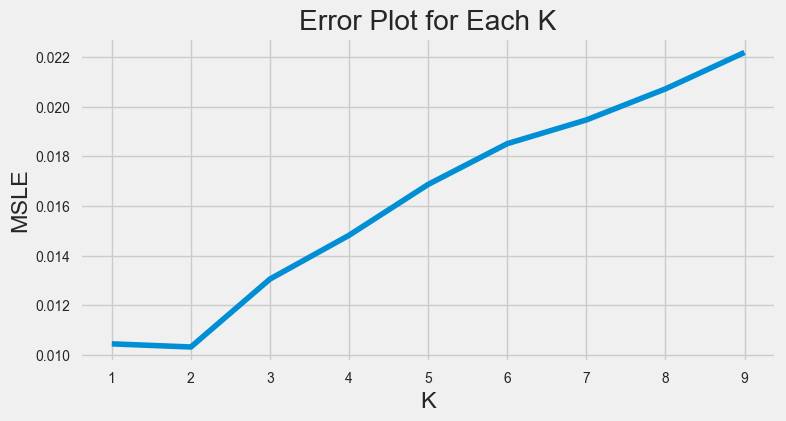

In [276]:
#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [277]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=2) 
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [278]:
#model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.010312195235159891
Root MSLE : 0.10154897948852018
R2 Score : 0.8820370526132383 or 88.2037%


In [208]:
r4_knn

[0.010312195235159891, 0.10154897948852018, 0.8820370526132383, 88.2037]

In [209]:
accu.to_csv('errors.csv')

In [210]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [211]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.0004975497322346118
Root MSLE : 0.022305822832494028
R2 Score : 0.994877178088401 or 99.4877%


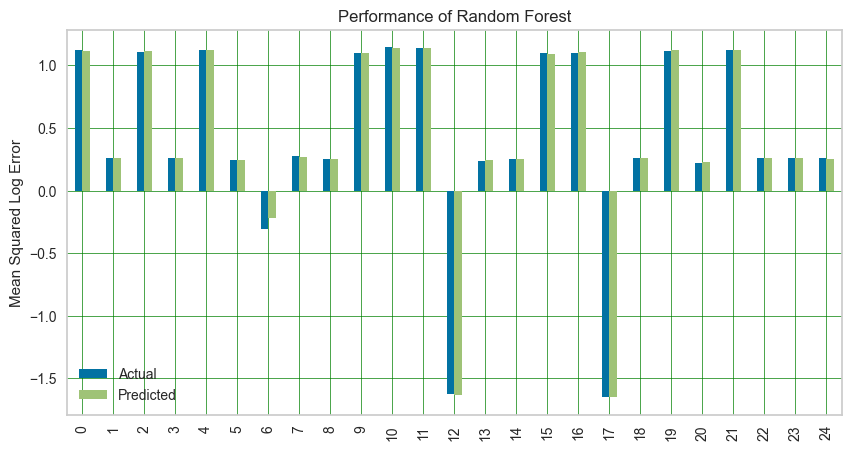

In [212]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

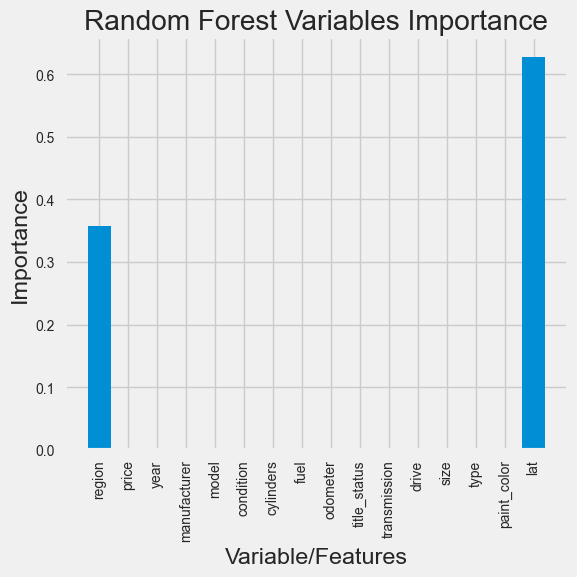

In [214]:
importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

In [215]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)

In [216]:
#model evaluation
r6_br=result(y_test,y_pred)
print("MSLE : {}".format(r6_br[0]))
print("Root MSLE : {}".format(r6_br[1]))
print("R2 Score : {} or {}%".format(r6_br[2],r6_br[3]))

MSLE : 0.0005158464348043526
Root MSLE : 0.022712252966281276
R2 Score : 0.9938261944009862 or 99.3826%


In [217]:
accu['Bagging Regressor']=r6_br
accu.to_csv('errors.csv')

In [218]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)
# Store the scaling parameters used for the target variable
target_scaling_params = {'mean': df['price'].mean(), 'std': df['price'].std()}

# Perform predictions on your X_test data
y_pred = xg_reg.predict(X_test)

# Inverse scaling on the predicted values to obtain the actual price
y_pred_actual = (y_pred * target_scaling_params['std']) + target_scaling_params['mean']

# Display the actual price predictions
print(y_pred_actual)

[10.371145  9.469641 10.363966 ...  9.477062  9.469167  9.455606]


In [219]:
y_pred_actual = np.exp(y_pred_actual)
y_pred_actual

array([31925.018, 12960.23 , 31696.64 , ..., 13056.772, 12954.088,
       12779.612], dtype=float32)

In [222]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

MSLE : 0.00027636694896472045
Root MSLE : 0.016624287923538875
R2 Score : 0.9881650453833521 or 98.8165%


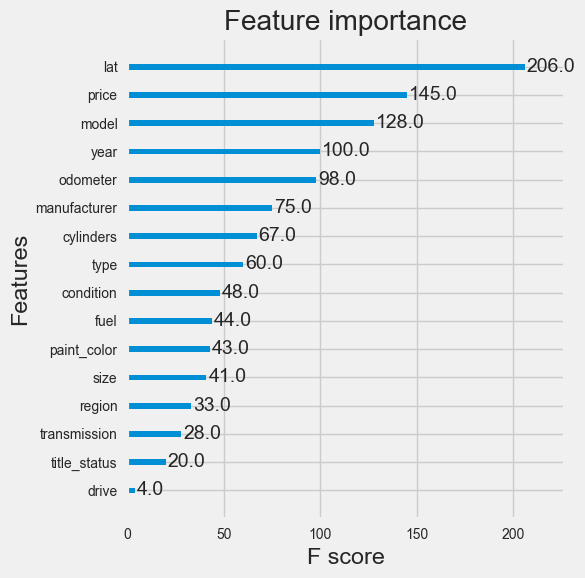

In [223]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

In [225]:
accu['XGBoost Regressor']=r8_xg
accu.to_csv('errors.csv')

In [226]:
accu=pd.read_csv('./errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,Lasso Regression,KNN,RandomForest Regressor,Bagging Regressor,XGBoost Regressor
MSLE,0.003889,0.003892,0.003888,0.010312,0.000498,0.000516,0.000276
Root MSLE,0.062360,0.062388,0.062351,0.101549,0.022306,0.022712,0.016624
R2 Score,0.668606,0.668057,0.668707,0.882037,0.994877,0.993826,0.988165
Accuracy(%),66.860600,66.805700,66.870700,88.203700,99.487700,99.382600,98.816500


In [227]:
model_accuracy=accu.loc['Accuracy(%)']

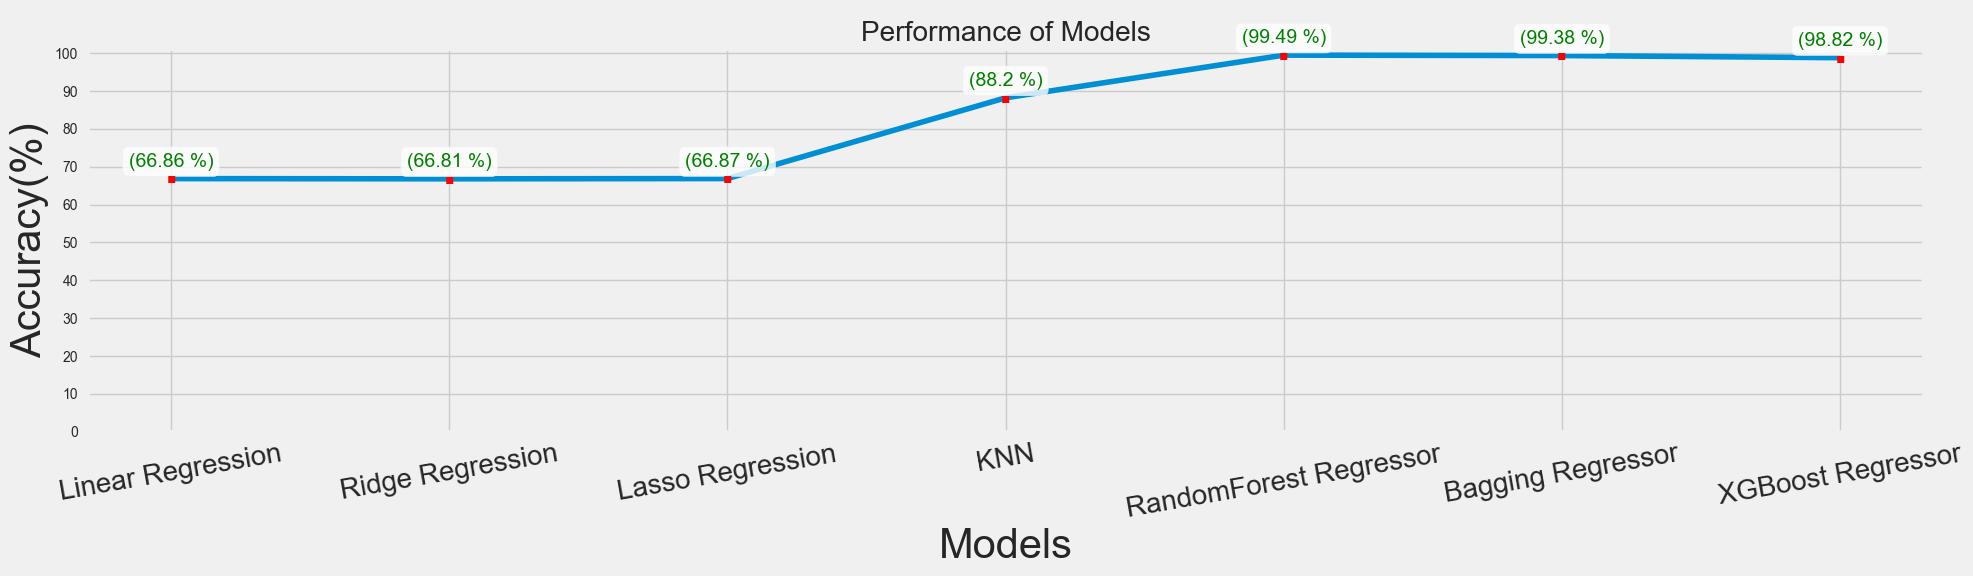

In [231]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();

In [15]:
import pickle

In [22]:
ruta_parametros = '../models/model_config.yaml'

In [23]:
with open(ruta_parametros, 'rb') as archivo:
    parametros_cargados = pickle.load(archivo)

In [ ]:
with open('le.pkl', 'wb') as archivo:
    pickle.dump(le, archivo)

In [24]:
print(parametros_cargados)

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.4, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 24, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'alpha': 5}


In [28]:
ruta_train_model = '../models/train_model.pkl'

In [29]:
with open(ruta_train_model, 'rb') as archivo:
    train_model_final = pickle.load(archivo)

In [30]:
print(train_model_final)

XGBRegressor(alpha=5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=24, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)
